{'Indre By': 43602, 'Østerbro': 116024, 'Nørrebro': 213582, 'Vesterbro/Kgs. Enghave': 231996, 'Valby': 240295, 'Vanløse': 204648, 'Brønshøj-Husum': 334593, 'Bispebjerg': 455064, 'Amager Øst': 463842, 'Amager Vest': 539030, 'Udenfor': 1922580}


<BarContainer object of 11 artists>

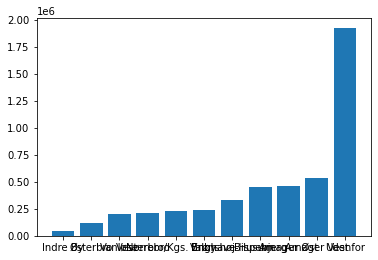

In [5]:
import numpy as np
import matplotlib.pyplot as plot

data = np.genfromtxt('../../data/befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}


amount_of_citizens = {v: np.sum(data[data[:,1] == k][:,1]) for k,v in neighb.items()}
print(amount_of_citizens)

sort_amount_of_citizens = {k: v for k,v in sorted(amount_of_citizens.items(), key=lambda x: x[1])}

plot.bar(sort_amount_of_citizens.keys(), sort_amount_of_citizens.values())



In [4]:
# Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
above_65_2015 = (data[:, 0] == 2015) & (data[:, 2] > 65)
print(np.sum(data[above_65_2015][:, 4]))


# How many of those were from the other nordic countries (not dk)
above_65_2015_finland = (data[:, 0] == 2015) & (data[:, 2] > 65) & (data[:, 3] == 5105) 
above_65_2015_norway = (data[:, 0] == 2015) & (data[:, 2] > 65) & (data[:, 3] == 5110)
above_65_2015_sweden = (data[:, 0] == 2015) & (data[:, 2] > 65) & (data[:, 3] == 5122)
finland_count = np.sum(data[above_65_2015_finland][:, 4])
sweden_count = np.sum(data[above_65_2015_sweden][:,4])
norway_count = np.sum(data[above_65_2015_norway][:, 4])
print('finland: ')
print(finland_count)
print('norway: ')
print(norway_count)
print('sweden: ')
print(sweden_count)
print('total nordics except DK')
print(finland_count + norway_count + sweden_count)



55750
finland: 
2
norway: 
236
sweden: 
2
total nordics except DK
240


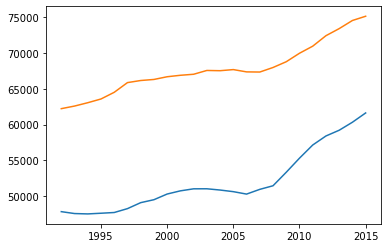

In [6]:
year_list = np.unique(data[:,0])
vesterbro = {year: np.sum(data[(data[:,0] == year) & (data[:,1] == 4)][:,4]) for year in year_list}
osterbro = {year: np.sum(data[(data[:,0] == year) & (data[:,1] == 2)][:,4]) for year in year_list}

vx, vy = zip(*vesterbro.items())
ox, oy = zip(*osterbro.items())

plot.plot(vx,vy)
plot.plot(ox, oy)